#Python Geospatial Analysis LAB - Part 1
## Fundamentals of Python Geospatial Analysis

# 🗺️ Why Use Python for Geospatial Analysis (GeoPandas)

## 🚫 No Proprietary Software Required
- **Free and Open Source:** GeoPandas and its related Python libraries (e.g., Shapely, Fiona, Rasterio) are completely open-source.  
- **No ArcGIS License Needed:** You can perform advanced spatial analysis without needing ArcGIS installation or costly software licenses.  
- **Cross-Platform Compatibility:** Works seamlessly on **Windows**, **macOS**, or **Linux**—all you need is Python!



## 🤖 Seamless Integration with Data Science & Machine Learning
- **Unified Workflow:** Combine geospatial data analysis with data science, statistics, and AI directly in Python.  
- **Machine Learning Ready:** Easily integrate with libraries such as **scikit-learn**, **PyTorch**, or **TensorFlow** for spatial prediction tasks.  
- **Data Pipeline Friendly:** Works well with **pandas**, **NumPy**, and **matplotlib**, enabling smooth data cleaning, transformation, and visualization in one environment.  



> ✅ **In short:** GeoPandas lets you do everything—from reading shapefiles to training spatial machine learning models—without switching tools or relying on proprietary software.

---

# 🌍 Understanding GeoPandas Core Concepts

## 🧩 Overview

[**GeoPandas**](https://geopandas.org) is an open-source Python library that extends **Pandas** to handle **geospatial data**.  
It allows you to work with spatial objects like **points**, **lines**, and **polygons** in a familiar DataFrame-style environment.

GeoPandas combines the power of several geospatial libraries — including **Shapely**, **Fiona**, **pyproj**, and **GDAL** — to perform tasks such as:
- Reading and writing shapefiles, GeoJSON, and other GIS formats  
- Conducting spatial joins and overlays  
- Reprojecting coordinate systems  
- Performing geometric operations (e.g., buffer, intersection, union)  


## 🏗️ How GeoPandas Works Under the Hood

GeoPandas builds on a stack of powerful open-source libraries that handle geometry, file access, and projections.

<p align="center">
  <img src="https://raw.githubusercontent.com/Zoey4222/python-geo-lab/main/images/geopandas%20structure.png" width="600" alt="GeoPandas dependency structure"/>
</p>

> 🔹 **Pandas** provides the tabular data structure.  
> 🔹 **Shapely** handles geometric objects and operations.  
> 🔹 **Fiona/pyogrio** provides file I/O for spatial data formats.  
> 🔹 **pyproj** deals with map projections and coordinate transformations.  
> 🔹 These rely on C/C++ libraries: **GEOS**, **GDAL**, and **PROJ** for efficient computation.



## 🧠 GeoDataFrame and GeoSeries

The **core data structures** in GeoPandas are:

- **`GeoSeries`** — similar to a Pandas Series, but each entry represents a geometric object (point, line, or polygon).  
- **`GeoDataFrame`** — similar to a Pandas DataFrame, but with one **active geometry column** that enables spatial operations.

<p align="center">
  <img src="https://raw.githubusercontent.com/Zoey4222/python-geo-lab/main/images/geodataframe%20structure.png" width="600" alt="GeoDataFrame structure diagram"/>
</p>

### Key Points:
- A `GeoDataFrame` can have multiple geometry columns, but only **one active geometry** at a time (accessible via `.geometry`).  
- You can perform all typical DataFrame operations, plus **spatial operations** like buffering, clipping, or joining based on location.  
- Geometry columns store objects defined by **Shapely** (e.g., `Point`, `LineString`, `Polygon`).  

---


# ⚙️ Setting Up and Using GeoPandas

## 💻 In Google Colab

If you’re using **Google Colab**, you’re all set!  
GeoPandas and most of its dependencies come **preinstalled**.  
Just import it directly — no extra steps needed:

```python
# %pip install geopandas
import geopandas as gpd


## 🏠 Working on Your Local Computer

If you’re working **locally**, it’s recommended to use a **virtual environment** for geospatial libraries.  
GeoPandas depends on native libraries (**GDAL**, **PROJ**, **GEOS**), which are best managed through **Conda**.



### 🧰 Step-by-Step Setup (Recommended: Conda)

```bash
# 1. Create a new virtual environment
conda create -n geo_env

# 2. Activate your environment
conda activate geo_env

# 3. Add the conda-forge channel (GeoPandas and dependencies live here)
conda config --env --add channels conda-forge
conda config --env --set channel_priority strict

# 4. Install Python and GeoPandas
conda install python=3 geopandas

## 📘 More Detailed Instructions

For full installation guidance, troubleshooting, and platform-specific setup tips, visit the official GeoPandas documentation:

🔗 [GeoPandas Installation Guide](https://geopandas.org/en/stable/getting_started/install.html)

---


# 📂 Reading and Writing Geospatial Files in GeoPandas

GeoPandas can easily **read and write** a variety of data formats — both tabular (like CSV or Excel) and classic GIS formats (like Shapefile or GeoJSON).  
It builds on **Fiona** and **pyogrio**, which act as interfaces to the powerful **GDAL** library.



## 🧾 Tabular Data

These formats contain attributes or coordinates that can be converted into geometry:

| Format | File Extension | Description |
|:-------|:---------------|:-------------|
| **CSV** | `.csv` | Comma-separated values; requires coordinate columns (e.g., latitude/longitude). |
| **Excel** | `.xlsx` | Excel spreadsheet; also requires coordinate columns to create geometry. |



## 🗺️ Classic GIS Formats

These are the most common geospatial vector data formats:

| Format | File Extension | Description |
|:--------|:---------------|:-------------|
| **ESRI Shapefile** | `.shp` | Traditional GIS format; widely supported but limited (no UTF-8, max field name length). |
| **GeoJSON** | `.geojson` | JSON-based text format for vector data; great for web maps and interoperability. |
| **FlatGeobuf** | `.fgb` | Modern binary geospatial format; fast and efficient for large datasets. |



## 🗄️ Database-Style Formats

For larger or multi-layer datasets stored in a single file or database:

| Format | File Extension | Description |
|:--------|:---------------|:-------------|
| **GeoPackage** | `.gpkg` | SQLite-based container supporting multiple layers, attributes, and coordinate systems. |
| **ESRI File Geodatabase** | `.gdb` | Proprietary ESRI format; can be read by GeoPandas but writing may have limitations. |



## 💡 Notes

- Use `gpd.read_file("filename.format")` to **load** data — GeoPandas automatically detects the format.  
- Use `gdf.to_file("output.format")` to **export** data in your desired format.  
- Always check your file’s **coordinate reference system (CRS)** after loading (`gdf.crs`).  



In [ ]:
# %pip install geopandas

Import GeoPandas and other necessary libraries:

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

We'll load the New York neighborhood dataset from a GeoJSON file hosted online.
🔗 [Data source: NYC Open Data](https://data.cityofnewyork.us/City-Government/2020-Neighborhood-Tabulation-Areas-NTAs-/9nt8-h7nd/about_data)

In [ ]:
nyc = gpd.read_file("https://data.cityofnewyork.us/resource/9nt8-h7nd.geojson")
nyc.head()

shape_area             ntaname  \
0  35321809.1186          Greenpoint   
1  28852852.7024        Williamsburg   
2  15208960.7998  South Williamsburg   
3  52267407.9188   East Williamsburg   
4  9982022.68717    Brooklyn Heights   

                                            cdtaname     shape_leng  boroname  \
0     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28919.5608161  Brooklyn   
1     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28134.0823157  Brooklyn   
2     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  18250.2803158  Brooklyn   
3     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   43184.798703  Brooklyn   
4  BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...  14312.1920681  Brooklyn   

  ntatype nta2020 borocode countyfips  ntaabbrev cdta2020  \
0       0  BK0101        3        047      Grnpt     BK01   
1       0  BK0102        3        047   Wllmsbrg     BK01   
2       0  BK0103        3        047  SWllmsbrg     BK01   
3       0  BK0104        3        047  EWllmsbrg     BK01   
4       0  BK0201        3        047      BkHts     BK02   

                                            geometry  
0  MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...  
1  MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4...  
2  MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...  
3  MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ...  
4  MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ...


You can also plot the NYC boroughs:

<Axes: >

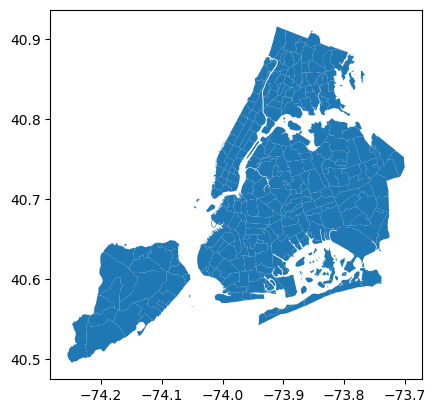

In [ ]:
nyc.plot()


GeoPandas also supports saving geospatial data back to disk. For example, we can save the GeoDataFrame as a new GeoJSON/shapefile/gpkg

In [ ]:
output_file = "nyc_neightbor.geojson"
nyc.to_file(output_file, driver="GeoJSON")
print(f"GeoDataFrame has been written to {output_file}")

GeoDataFrame has been written to nyc_neightbor.geojson


In [ ]:
output_file = "nyc_neighbor.shp"
nyc.to_file(output_file)

In [ ]:
output_file = "nyc_neighbor.gpkg"
nyc.to_file(output_file, driver="GPKG")

# 🧱 Creating GeoDataFrames

A **GeoDataFrame** is a tabular data structure (like a pandas DataFrame) that contains a special column named **`geometry`**,  
which stores geometric objects such as **points**, **lines**, or **polygons**.

You can create a GeoDataFrame in two main ways:
1. From a list of **geometry objects**  
2. From an existing **pandas DataFrame** containing coordinate information


We'll load the New York path station dataset from csv file

In [ ]:
path = pd.read_csv('https://raw.githubusercontent.com/Zoey4222/python-geo-lab/main/data/PATH_STATION_20251005_clean.csv')
path.head()

NAME  longitude   latitude
0         33rd Street -73.988434  40.748528
1         23rd Street -73.993016  40.742810
2         14th Street -73.997062  40.737363
3          9th Street -73.998672  40.734070
4  Christopher Street -74.007262  40.732988

In [ ]:
path_gdf = gpd.GeoDataFrame(path,geometry=gpd.points_from_xy(path.longitude, path.latitude))
path_gdf.head()

NAME  longitude   latitude                    geometry
0         33rd Street -73.988434  40.748528  POINT (-73.98843 40.74853)
1         23rd Street -73.993016  40.742810  POINT (-73.99302 40.74281)
2         14th Street -73.997062  40.737363  POINT (-73.99706 40.73736)
3          9th Street -73.998672  40.734070  POINT (-73.99867 40.73407)
4  Christopher Street -74.007262  40.732988  POINT (-74.00726 40.73299)

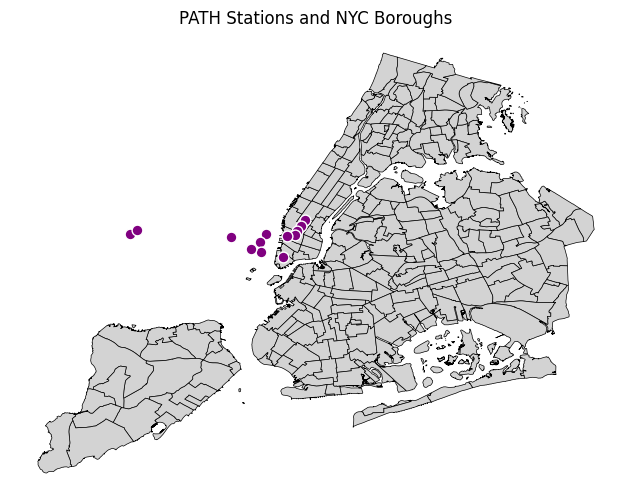

In [ ]:
# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot NYC polygons (base layer)
nyc.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.5)

# Plot PATH stations on top
path_gdf.plot(ax=ax, color="purple", markersize=60, marker="o", edgecolor="white")

# Add title and improve layout
ax.set_title("PATH Stations and NYC Boroughs")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_axis_off()  # optional — cleaner map view

plt.show()

# 🌐 Coordinate Reference Systems (CRS)

Every spatial dataset must specify how its coordinates relate to real-world locations.  
This definition is called the **Coordinate Reference System (CRS)** — it tells GeoPandas (and other GIS tools)  
how to interpret your longitude, latitude, or projected coordinates.



## 🧭 What Is a CRS?

A **CRS** defines the mathematical relationship between geographic coordinates (longitude/latitude)  
and their actual positions on the Earth's surface.

There are two broad categories:

| Type | Description | Example EPSG Code |
|:------|:-------------|:-----------------|
| **Geographic CRS** | Coordinates are in degrees (longitude, latitude). | `EPSG:4326` (WGS 84 — used by GPS and Google Maps) |
| **Projected CRS** | Coordinates are in meters or feet, suitable for distance and area calculations. | `EPSG:2263` (NAD83 / New York Long Island), `EPSG:3857` (Web Mercator) |

> 🧩 Notice the difference:
> - Google Maps shows coordinates in **degrees** (e.g., `40.76947, -73.97416`).  
> - QGIS or professional GIS systems may display **projected coordinates** (e.g., `X=-8234923, Y=4978578`).


<p align="center">
  <img src="https://raw.githubusercontent.com/Zoey4222/python-geo-lab/main/images/CRS_Google_vs_QGIS.png" width="1000" alt="Coordinate examples from Google Maps and QGIS">
</p>




## 🔍 Checking CRS in GeoPandas

You can check the CRS of any GeoDataFrame using the `.crs` attribute:

```python
nyc.crs


## 🔄 Reprojecting Data

When combining datasets, all layers must share the **same CRS**.  
Otherwise, spatial operations such as joins, overlays, and distance calculations may produce incorrect results.

You can reproject one GeoDataFrame to match another using the **`.to_crs()`** method:

```python
nyc_projected = nyc.to_crs(epsg=2263)  # Convert to NAD83 / New York Long Island


> ⚠️ **Always check CRS** before performing spatial joins, distance, or buffer operations.  
> Mismatched CRS values are one of the most common causes of spatial analysis errors.



For reference, you can explore CRS definitions and EPSG codes at  
🔗 [https://epsg.io/](https://epsg.io/)



## ✅ Summary

- Use **`EPSG:4326`** for longitude/latitude data (global standard).  
- Use **projected CRS** (e.g., `EPSG:2263`) for measuring distances or areas in meters.  
- Always ensure all GeoDataFrames share the same CRS before performing spatial operations.


In [ ]:
nyc_borough = gpd.read_file("https://raw.githubusercontent.com/Zoey4222/python-geo-lab/main/data/Borough_Boundaries_20251005_EPSG2263.geojson")

In [ ]:
nyc_borough.head()

borocode       boroname     shape_area     shape_leng reprojected_to  \
0        5  Staten Island  1623618358.46  325912.288988      EPSG:2263   
1        2          Bronx  1187199300.36   463147.07196      EPSG:2263   
2        3       Brooklyn  1934462608.01  726953.045551      EPSG:2263   
3        4         Queens  3041419183.81   887905.07876      EPSG:2263   
4        1      Manhattan  636627849.644  359193.930112      EPSG:2263   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1012821.806 229228.265, 101278...  
2  MULTIPOLYGON (((1022227.32 152028.146, 1022078...  
3  MULTIPOLYGON (((1032452.015 154469.237, 103245...  
4  MULTIPOLYGON (((981219.056 188655.316, 980940....

/tmp/ipython-input-3461921034.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
/tmp/ipython-input-3461921034.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


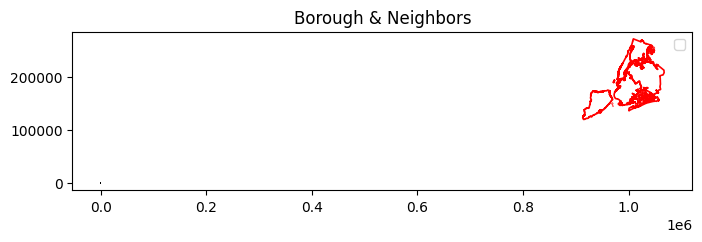

In [ ]:

fig, ax = plt.subplots(figsize=(8, 6))


nyc.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.5, label="nyc (EPSG:4326)")
nyc_borough.plot(ax=ax, color="none", edgecolor="red", linewidth=1.2, label="nyc_borough (EPSG:2263)")

ax.set_title("Borough & Neighbors")
ax.legend()

plt.show()

The two layers will not align — one will appear completely off (sometimes even invisible in the plot extent).

In [ ]:
print("nyc_borough's crs: ", nyc_borough.crs)
print("nyc neighbor's crs: ", nyc.crs)

nyc_borough's crs:  EPSG:2263
nyc neighbor's crs:  EPSG:4326


The CRS for this dataset is [`EPSG:2263`](https://epsg.io/2263) (NAD83 / New York State Plane). We can reproject the geometries to WGS84 ([`EPSG:4326`](https://epsg.io/4326)), which uses latitude and longitude coordinates.

[EPSG](https://epsg.io) stands for European Petroleum Survey Group, which was a scientific organization that standardized geodetic and coordinate reference systems. EPSG codes are unique identifiers that represent coordinate systems and other geodetic properties.

### Reprojecting to WGS84

In [ ]:
# Reproject the GeoDataFrame to WGS84 (EPSG:4326)
nyc_borough_4326 = nyc_borough.to_crs(epsg=4326)

/tmp/ipython-input-3153781571.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
/tmp/ipython-input-3153781571.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


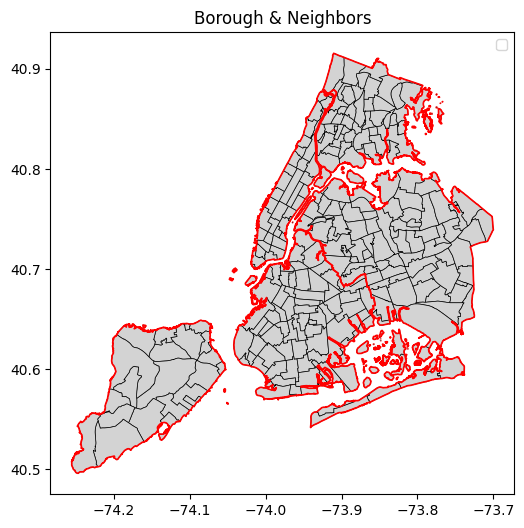

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))


nyc.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.5, label="nyc (EPSG:4326)")
nyc_borough_4326.plot(ax=ax, color="none", edgecolor="red", linewidth=1.2, label="nyc_borough (EPSG:2263)")

ax.set_title("Borough & Neighbors")
ax.legend()

plt.show()

## Simple Accessors and Methods

Now that we have the data, let's explore some simple GeoPandas methods to manipulate and analyze the geometric data.

### Measuring Area

We can calculate the area of each borough. GeoPandas automatically calculates the area of each polygon:

In [ ]:
# Set BoroName as the index for easier reference
nyc_borough = nyc_borough.set_index("boroname")

# Calculate the area
nyc_borough["area"] = nyc_borough.area
nyc_borough

borocode     shape_area     shape_leng reprojected_to  \
boroname                                                              
Staten Island        5  1623618358.46  325912.288988      EPSG:2263   
Bronx                2  1187199300.36   463147.07196      EPSG:2263   
Brooklyn             3  1934462608.01  726953.045551      EPSG:2263   
Queens               4  3041419183.81   887905.07876      EPSG:2263   
Manhattan            1  636627849.644  359193.930112      EPSG:2263   

                                                        geometry          area  
boroname                                                                        
Staten Island  MULTIPOLYGON (((970217.022 145643.332, 970227....  1.623620e+09  
Bronx          MULTIPOLYGON (((1012821.806 229228.265, 101278...  1.187201e+09  
Brooklyn       MULTIPOLYGON (((1022227.32 152028.146, 1022078...  1.934463e+09  
Queens         MULTIPOLYGON (((1032452.015 154469.237, 103245...  3.041420e+09  
Manhattan      MULTIPOLYGON (((981219.056 188655.316, 980940....  6.366275e+08

### Getting Polygon Boundaries and Centroids

To get the boundary (lines) and centroid (center point) of each polygon:

In [ ]:
# Get the boundary of each polygon
nyc_borough["boundary"] = nyc_borough.boundary

# Get the centroid of each polygon
nyc_borough["centroid"] = nyc_borough.centroid

nyc_borough[["boundary", "centroid"]]

boundary  \
boroname                                                           
Staten Island  MULTILINESTRING ((970217.022 145643.332, 97022...   
Bronx          MULTILINESTRING ((1012821.806 229228.265, 1012...   
Brooklyn       MULTILINESTRING ((1022227.32 152028.146, 10220...   
Queens         MULTILINESTRING ((1032452.015 154469.237, 1032...   
Manhattan      MULTILINESTRING ((981219.056 188655.316, 98094...   

                                     centroid  
boroname                                       
Staten Island   POINT (941637.916 150927.029)  
Bronx          POINT (1021180.121 249943.882)  
Brooklyn        POINT (998722.001 174177.133)  
Queens         POINT (1034558.142 197136.185)  
Manhattan       POINT (993334.411 222448.595)

### Measuring Distance

We can also measure the distance from each borough's centroid to a reference point, such as the centroid of Manhattan.

In [ ]:
# Use Manhattan's centroid as the reference point
manhattan_centroid = nyc_borough.loc["Manhattan", "centroid"]

# Calculate the distance from each centroid to Manhattan's centroid
nyc_borough["distance_to_manhattan"] = nyc_borough["centroid"].distance(manhattan_centroid)
nyc_borough[["centroid", "distance_to_manhattan"]]

centroid  distance_to_manhattan
boroname                                                            
Staten Island   POINT (941637.916 150927.029)           88248.864518
Bronx          POINT (1021180.121 249943.882)           39132.778747
Brooklyn        POINT (998722.001 174177.133)           48571.186977
Queens         POINT (1034558.142 197136.185)           48374.725374
Manhattan       POINT (993334.411 222448.595)               0.000000

### Calculating Mean Distance

We can calculate the mean distance between the borough centroids and Manhattan:

In [ ]:
mean_distance = nyc_borough["distance_to_manhattan"].mean()
print(f"Mean distance to Manhattan: {mean_distance} units")

Mean distance to Manhattan: 44865.51112319586 units


## Geometry Manipulations

GeoPandas provides several methods for manipulating geometries, such as buffering (creating a buffer zone around geometries) and computing convex hulls (the smallest convex shape enclosing the geometries).

### Buffering Geometries

We can create a buffer zone around each borough:

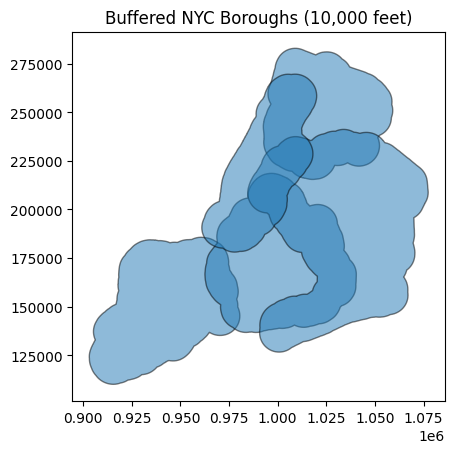

In [ ]:
# Buffer the boroughs by 10000 feet
nyc_borough["buffered"] = nyc_borough.buffer(10000)

# Plot the buffered geometries
nyc_borough["buffered"].plot(alpha=0.5, edgecolor="black")
plt.title("Buffered NYC Boroughs (10,000 feet)")
plt.show()

# 🧩 Spatial Relations & Queries

In geospatial analysis, we often need to understand how two geometries relate to one another —  
whether they **touch**, **overlap**, or if one is **contained within** another.

GeoPandas (via **Shapely**) provides a powerful set of **spatial predicate methods** that allow you  
to perform these spatial relationship queries directly on geometries or entire GeoDataFrames.



## 🔍 Common Spatial Relationships

| Method | Description | Example |
|:--------|:-------------|:----------|
| `.disjoint()` | Returns True if geometries share **no points in common** | Manhattan and Staten Island polygons |
| `.contains()` | A contains B entirely | NYC borough contains a park |
| `.within()` | A is completely inside B | Park within Manhattan polygon |
| `.equals()` | A and B are geometrically identical | Two identical road segments |
| `.touches()` | A and B **touch** at boundary only | Manhattan polygon touches Bronx at border |
| `.overlaps()` | A and B overlap but neither fully contains the other | Two zoning districts partially overlap |
| `.covers()` | A covers all of B (similar to contains but allows boundary touching) | NYC borough covers census tract |
| `.covered_by()` | A is covered by B | Census tract covered by borough polygon |

---

<p align="center">
  <img src="https://raw.githubusercontent.com/Zoey4222/python-geo-lab/main/images/spatial_relations.png" width="850" alt="Spatial relations illustration">
</p>




### Checking for within, overlaps, intersections

Similarly, we can check which nyc neighbors overlap, within and intersect the Manhattan polygon

In [ ]:
# # Manhattan geometry (nyc_borough is EPSG:2263)
# manhattan_geom = nyc_borough.loc[nyc_borough["boro_name"] == "Manhattan", "geometry"].iloc[0]

# # Reproject nyc (EPSG:4326) to match Manhattan's CRS
# nyc_2263 = nyc.to_crs(nyc_borough.crs)

# Spatially relative to Manhattan
mask_overlaps   = nyc_2263.overlaps(manhattan_geom)    # intersects, but neither contains the other
mask_within     = nyc_2263.within(manhattan_geom)      # fully inside
mask_intersects = nyc_2263.intersects(manhattan_geom)  # any intersection (touch/overlap/within)

nyc_overlaps = nyc_2263[mask_overlaps]
nyc_within   = nyc_2263[mask_within]
nyc_intersects = nyc_2263[mask_intersects]

print("Counts relative to Manhattan:")
print(f"  overlaps:   {mask_overlaps.sum()}")
print(f"  within:     {mask_within.sum()}")
print(f"  intersects: {mask_intersects.sum()}")



Counts relative to Manhattan:
  overlaps:   26
  within:     15
  intersects: 48


/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:480: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:480: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:480: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:480: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:480: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:480: UserWarning: 

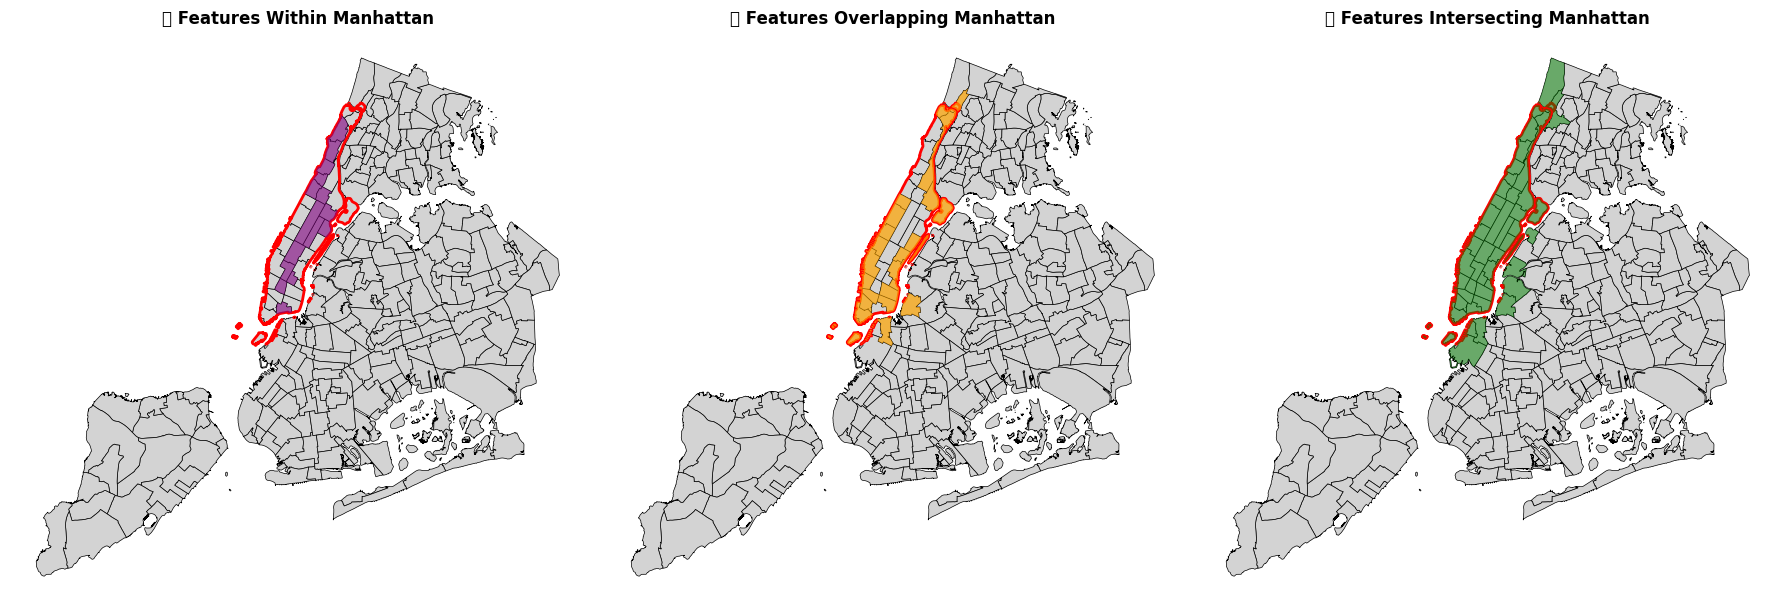

In [ ]:
# Plot to visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Within ---
nyc_2263.plot(ax=axes[0], color="lightgray", edgecolor="black", linewidth=0.5)
gpd.GeoSeries([manhattan_geom], crs=nyc_borough.crs).plot(ax=axes[0], color="none", edgecolor="red", linewidth=2)
if len(nyc_within) > 0:
    nyc_within.plot(ax=axes[0], color="purple", alpha=0.6)
axes[0].set_title("🟣 Features Within Manhattan", fontsize=12, fontweight="bold")
axes[0].set_axis_off()

# --- Overlaps ---
nyc_2263.plot(ax=axes[1], color="lightgray", edgecolor="black", linewidth=0.5)
gpd.GeoSeries([manhattan_geom], crs=nyc_borough.crs).plot(ax=axes[1], color="none", edgecolor="red", linewidth=2)
if len(nyc_overlaps) > 0:
    nyc_overlaps.plot(ax=axes[1], color="orange", alpha=0.7)
axes[1].set_title("🟠 Features Overlapping Manhattan", fontsize=12, fontweight="bold")
axes[1].set_axis_off()

# --- Intersects ---
nyc_2263.plot(ax=axes[2], color="lightgray", edgecolor="black", linewidth=0.5)
gpd.GeoSeries([manhattan_geom], crs=nyc_borough.crs).plot(ax=axes[2], color="none", edgecolor="red", linewidth=2)
if len(nyc_intersects) > 0:
    nyc_intersects.plot(ax=axes[2], color="green", alpha=0.5)
axes[2].set_title("🟢 Features Intersecting Manhattan", fontsize=12, fontweight="bold")
axes[2].set_axis_off()



plt.tight_layout()
plt.show()

intersects = within + overlaps + touches

you can define more strict "intersect" rule by yoursefl
```python
mask_intersects_strict = nyc_2263.intersects(manhattan_geom) & ~nyc_2263.touches(manhattan_geom)


# 🧮 Spatial Operations

Spatial operations go beyond describing *relationships* between geometries —  
they actually **create new geometries** or **transform existing ones** based on spatial logic.

These operations allow us to:
- Clip datasets to specific areas (e.g., cut a map by borough boundary)
- Merge or dissolve polygons (e.g., combine all NYC parks into one)
- Measure distances, areas, and buffers
- Compute intersections, unions, and differences between layers



## 🧱 Concept: Layers and Spatial Processing

Each spatial dataset can be thought of as a **layer** — points, lines, and polygons stacked together.  
Spatial operations let you combine these layers to extract or modify information.



## ⚙️ Common Spatial Operations in GeoPandas

| Operation | Method | Description | Example |
|:-----------|:--------|:-------------|:----------|
| **Buffer** | `.buffer(distance)` | Creates a new geometry expanded outward by a fixed distance | Create 500-m zones around PATH stations |
| **Intersection** | `.intersection(other)` | Keeps only overlapping areas between geometries | Cut roads to Manhattan boundary |
| **Union** | `.union(other)` | Merges multiple geometries into one combined area | Merge all boroughs into a single NYC polygon |
| **Difference** | `.difference(other)` | Removes overlapping portion from the first geometry | Subtract parks from borough land area |
| **Clip** | `gpd.clip(layer, mask)` | Extracts features that fall within another geometry | Clip neighborhoods to Manhattan polygon |
| **Dissolve** | `.dissolve(by=...)` | Aggregates features sharing a common attribute | Dissolve by `borough_name` to make borough boundaries |



## 🧩 Example: Clip to Manhattan





In [ ]:
# Clip NYC neighborhoods (nyc_2263) to the Manhattan polygon
nyc_manhattan_clip = gpd.clip(nyc_2263, manhattan_geom)

# Clip path station to the Manhattan polygon
# firstly, need to convert path station to crs 2263

path_gdf = path_gdf.set_crs("EPSG:4326")

# Then reproject to match borough CRS (EPSG:2263)
path_gdf_2263 = path_gdf.to_crs(nyc_borough.crs)

# Clip to Manhattan
path_manhattan_clip = gpd.clip(path_gdf_2263, manhattan_geom)

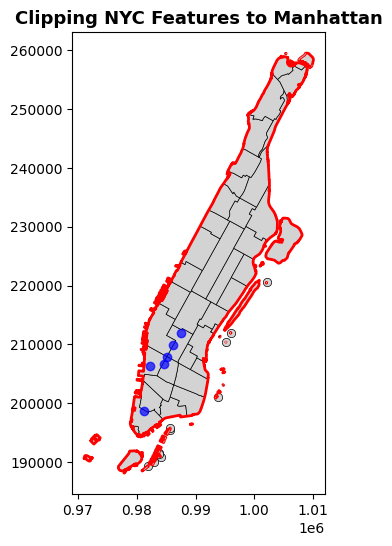

In [50]:
# Plot result
fig, ax = plt.subplots(figsize=(8, 6))

nyc_manhattan_clip.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.5)
path_manhattan_clip.plot(ax=ax, color="blue", alpha=0.7)
gpd.GeoSeries([manhattan_geom], crs=nyc_borough.crs).plot(ax=ax, color="none", edgecolor="red", linewidth=2)
ax.set_title("Clipping NYC Features to Manhattan", fontsize=13, fontweight="bold")
plt.show()

# 🗺️ Spatial Visualization with GeoPandas

Visualization is one of the most powerful features of GeoPandas.  
With only a few lines of code, you can produce high-quality **maps**, **choropleths**, and **basemaps**.


## 📊 Basic Plotting

Every `GeoDataFrame` has a built-in `.plot()` method.

## 🧩 Layered Visualization

You can overlay multiple layers by plotting them on the same **ax** (Matplotlib axis).


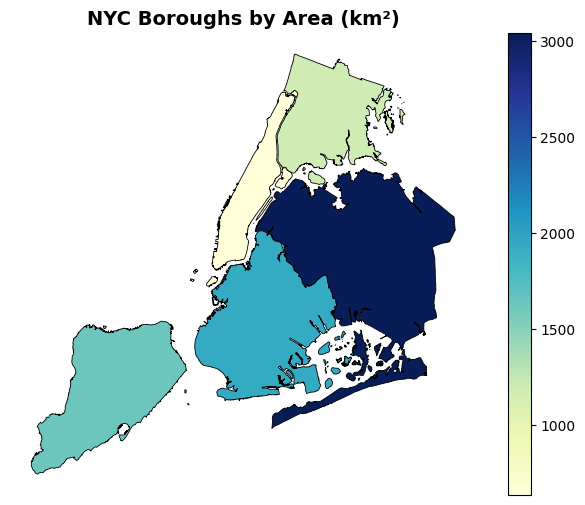

In [53]:
# Convert to square kilometers for easier reading
nyc_borough["area_km2"] = nyc_borough["area"] / 1e6

# Plot choropleth by area
fig, ax = plt.subplots(figsize=(8, 6))
nyc_borough.plot(
    column="area_km2",
    cmap="YlGnBu",       # color palette
    legend=True,
    edgecolor="black",
    linewidth=0.6,
    ax=ax
)

ax.set_title("NYC Boroughs by Area (km²)", fontsize=14, fontweight="bold")
ax.axis("off")
plt.show()


## 🌍 Adding a Basemap with `contextily`

For map tiles (like OpenStreetMap), use the **`contextily`** library.



In [55]:
%pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 68.1 MB/s eta 0:00:00


In [56]:
import contextily as ctx

In [59]:
from matplotlib.lines import Line2D

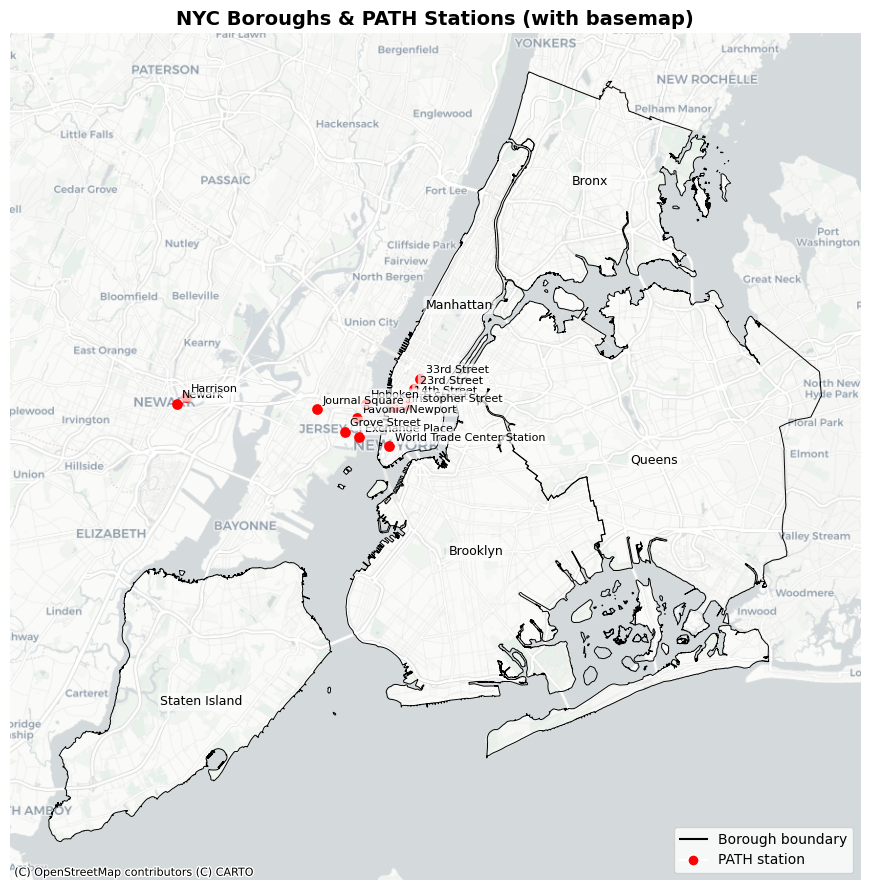

In [65]:
# Reproject copies to EPSG:3857 for basemap display
# Basemaps from providers such as OpenStreetMap, CartoDB, or Google Maps are always served in EPSG:3857, also known as Web Mercator.
boros_3857 = nyc_borough.to_crs(epsg=3857)
stations_3857 = path_gdf_2263.to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(10, 9))

# Polygons (boroughs)
boros_3857.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.7, label="Borough boundary")

# Points (PATH stations)
stations_3857.plot(ax=ax, color="red", markersize=45, label="PATH station")

# ---- Borough labels ----

name_col = None
for col in nyc_borough.columns:
    if col.lower() in {"boroname", "boro_name", "borough", "boro", "name"}:
        name_col = col
        break

for idx, row in boros_3857.iterrows():
    pt = row.geometry.representative_point()
    label = str(row[name_col]) if name_col else str(idx)
    ax.annotate(
        text=label,
        xy=(pt.x, pt.y),
        xytext=(0, 0),
        textcoords="offset points",
        fontsize=9,
        ha="center",
        va="center",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.6)
    )

# ---- Station labels ----
label_col_station = "NAME" if "NAME" in path_gdf_2263.columns else (
    "name" if "name" in path_gdf_2263.columns else path_gdf_2263.columns[0]
)
for _, row in stations_3857.iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.annotate(
        text=str(row[label_col_station]),
        xy=(x, y),
        xytext=(4, 4),  # slight offset from the marker
        textcoords="offset points",
        fontsize=8,
        color="black",
        bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.7)
    )

# Basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Legend
handles = [
    Line2D([0], [0], color="black", lw=1.5, label="Borough boundary"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor="red", markersize=8, label="PATH station"),
]
ax.legend(handles=handles, loc="lower right")

ax.set_title("NYC Boroughs & PATH Stations (with basemap)", fontsize=14, fontweight="bold")
ax.set_axis_off()
plt.tight_layout()
plt.show()